In [ ]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd


# Read Dataset

In [371]:
train_df = pd.read_csv("training.csv")

## Data Exploration

In [372]:
train_df.shape

(25920, 18)

In [374]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID1                        25920 non-null  int64  
 1   Specific ailments          25920 non-null  int64  
 2   ID2                        25920 non-null  int64  
 3   Food preference            25910 non-null  object 
 4   Age                        25920 non-null  int64  
 5   BMI                        25920 non-null  float64
 6   Smoker?                    25920 non-null  object 
 7   Living in?                 25920 non-null  object 
 8   Any heriditary condition?  25920 non-null  object 
 9   Follow Diet                24947 non-null  float64
 10  Physical activity          24947 non-null  float64
 11  Regular sleeping hours     24947 non-null  float64
 12  Alcohol consumption        24947 non-null  float64
 13  Social interaction         24947 non-null  flo

In [375]:
for column in train_df.columns:
    if (train_df[column].isnull().any()):
        print(column)

Food preference
Follow Diet
Physical activity
Regular sleeping hours
Alcohol consumption
Social interaction
Taking supplements
Mental health management
Illness count last year


In [376]:
for column in train_df.columns:
    print(column, train_df[column].unique())

ID1 [ 2408 25063 26798 ...  4263 11208 21535]
Specific ailments [44 39 29 27  9 13 21  7 18 20 16 49 51 15  4  5 33 10 41 38 14 12 43 28
  6 34  1 17  2 48 36 19 25 11 37 52 42  8 24 31 30 26 50 22 40 32 45 47
 35  3 46 23  0]
ID2 [ 2668 10363   132 ...  6886  2521 12190]
Food preference ['DX6' 'DX3 DX4 ' 'DX1 ' 'DX4 DX5 ' 'DX5 ' 'DX2 ' 'DX2 DX4 '
 'DX2 DX4 DX5 ' 'DX2 DX5 ' 'DX3 ' 'DX1 DX5 ' 'DX4 ' 'DX1 DX3 ' 'DX1 DX2 '
 'DX1 DX3 DX4 ' 'DX1 DX3 DX5 ' 'DX1 DX2 DX5 ' 'DX2 DX3 DX5 ' 'DX1 DX4 '
 'DX2 DX3 DX4 ' 'DX1 DX2 DX3 ' 'DX2 DX3 ' 'DX3 DX4 DX5 ' 'DX1 DX4 DX5 '
 'DX1 DX2 DX4 ' 'DX3 DX5 ' 'DX1 DX3 DX4 DX5 ' 'DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX4 DX5 ' nan 'DX1 DX2 DX3 DX5 ' 'DX1 DX2 DX3 DX4 DX5 '
 'DX1 DX2 DX3 DX4 ']
Age [ 49  20   1  30  40  64  26   4  12  42  65   3  63  32  10  48  47   9
  11   7  24  23  25  62  13   8  57  52  54  44  56  22  29  60  43  58
   5  27  15  51  37  46  19  17  16   0   6  34  50  33  41  28  21   2
  18  59  53  31  39  66  55  61  36  45  14  35  38 114 

In [377]:
train_df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,Stable,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [378]:
# drop unnecessary columns
train_df.drop(['Any heriditary condition?'], axis=1, inplace=True)

In [379]:
columns_to_fill = ['Follow Diet', 'Physical activity', 'Regular sleeping hours', 'Alcohol consumption',
                   'Social interaction', 'Taking supplements', 'Mental health management', 'Illness count last year']

for col in columns_to_fill:
    train_df[col].fillna(0, inplace=True)
    
train_df['Food preference'].fillna('', inplace=True)

train_df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy
0,2408,44,2668,DX6,49,20.500470,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
1,25063,39,10363,DX3 DX4,20,26.076580,NO,URBAN,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,26798,29,132,DX6,1,21.420866,NO,URBAN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,31907,27,10499,DX1,30,25.203247,NO,RURAL,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,26412,9,7963,DX6,40,19.355846,YES,RURAL,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1


In [380]:
train_df = pd.get_dummies(train_df, columns = ['Smoker?', 'Living in?'], drop_first=True)
train_df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year,Healthy,Smoker?_NO,Smoker?_YES,Living in?_URBAN
0,2408,44,2668,DX6,49,20.500470,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0
1,25063,39,10363,DX3 DX4,20,26.076580,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1,1,0,1
2,26798,29,132,DX6,1,21.420866,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,1,0,1
3,31907,27,10499,DX1,30,25.203247,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1,1,0,0
4,26412,9,7963,DX6,40,19.355846,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1,0,1,0


In [381]:
def get_food_preferences(row):
    food_preference = row['Food preference']
    dx_1 = 1 if 'DX1' in food_preference else 0
    dx_2 = 1 if 'DX2' in food_preference else 0
    dx_3 = 1 if 'DX3' in food_preference else 0
    dx_4 = 1 if 'DX4' in food_preference else 0
    dx_5 = 1 if 'DX5' in food_preference else 0
    dx_6 = 1 if 'DX6' in food_preference else 0
    return pd.Series([dx_1, dx_2, dx_3, dx_4, dx_5, dx_6])

train_df[['Food preference_DX1', 'Food preference_DX2', 'Food preference_DX3',
          'Food preference_DX4', 'Food preference_DX5', 'Food preference_DX6']] = train_df.apply(get_food_preferences, axis=1)

train_df.drop(['Food preference'], axis=1, inplace=True)

train_df.head()

,ID1,Specific ailments,ID2,Age,BMI,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,...,Healthy,Smoker?_NO,Smoker?_YES,Living in?_URBAN,Food preference_DX1,Food preference_DX2,Food preference_DX3,Food preference_DX4,Food preference_DX5,Food preference_DX6
0,2408,44,2668,49,20.500470,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,0,0,0,0,0,1
1,25063,39,10363,20,26.076580,0.0,0.0,0.0,0.0,1.0,...,1,1,0,1,0,0,1,1,0,0
2,26798,29,132,1,21.420866,1.0,0.0,0.0,0.0,0.0,...,0,1,0,1,0,0,0,0,0,1
3,31907,27,10499,30,25.203247,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,1,0,0,0,0,0
4,26412,9,7963,40,19.355846,1.0,0.0,0.0,0.0,1.0,...,1,0,1,0,0,0,0,0,0,1


In [382]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25920 entries, 0 to 25919
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ID1                       25920 non-null  int64  
 1   Specific ailments         25920 non-null  int64  
 2   ID2                       25920 non-null  int64  
 3   Age                       25920 non-null  int64  
 4   BMI                       25920 non-null  float64
 5   Follow Diet               25920 non-null  float64
 6   Physical activity         25920 non-null  float64
 7   Regular sleeping hours    25920 non-null  float64
 8   Alcohol consumption       25920 non-null  float64
 9   Social interaction        25920 non-null  float64
 10  Taking supplements        25920 non-null  float64
 11  Mental health management  25920 non-null  float64
 12  Illness count last year   25920 non-null  float64
 13  Healthy                   25920 non-null  int64  
 14  Smoker

# Feature Selection

In [383]:
from sklearn.feature_selection import chi2

X = train_df.drop(['Healthy'], axis=1)
y = train_df['Healthy']

f_score = chi2(X, y)
f_score = pd.Series(f_score[1])
f_score.index = X.columns
f_score.sort_values(ascending=False)

Taking supplements           8.917650e-01
Social interaction           1.154275e-01
ID1                          6.253405e-02
Mental health management     1.512507e-02
Specific ailments            3.007388e-03
Follow Diet                  6.586092e-06
Regular sleeping hours       6.104977e-10
Physical activity            1.638059e-16
Illness count last year      1.978489e-24
Food preference_DX4          3.496668e-40
BMI                          2.435416e-42
Food preference_DX2          1.658978e-42
Living in?_URBAN             5.801980e-53
Alcohol consumption          2.415982e-56
Food preference_DX3          8.425611e-74
Food preference_DX1          3.119715e-82
Smoker?_NO                  4.895505e-154
Food preference_DX5         2.581997e-170
Smoker?_YES                 5.909544e-210
ID2                         1.753724e-267
Age                          0.000000e+00
Food preference_DX6          0.000000e+00
dtype: float64

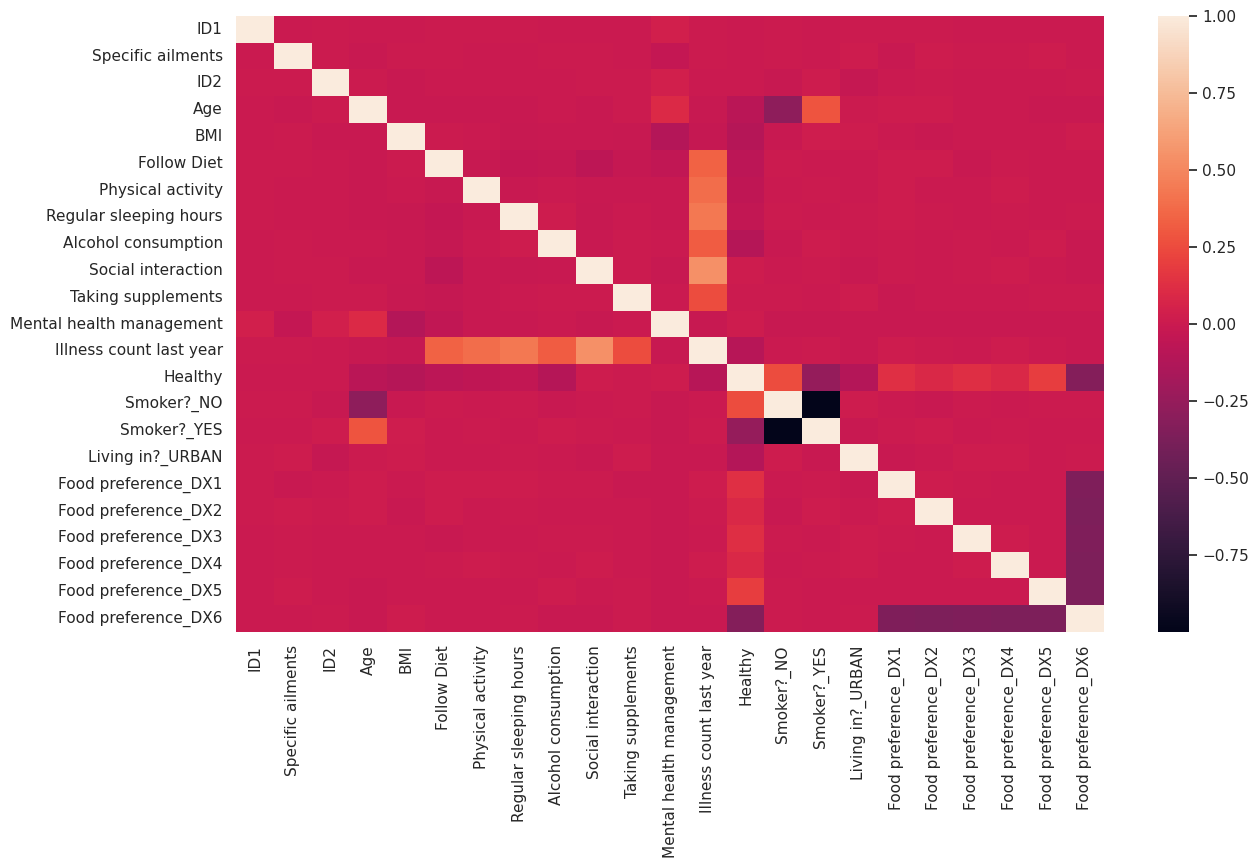

In [384]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = train_df.corr()
heatmap = sns.heatmap(corr)

# Train Test Split

In [385]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.1, random_state=23)

# Train Models

In [386]:
models = []
f1_scores = []

In [387]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('LogisticRegression')
f1_scores.append(score)

In [388]:
neigh_model = KNeighborsClassifier(n_neighbors=1)
neigh_model.fit(X_train, y_train)
y_pred = neigh_model.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('KNeighborsClassifier')
f1_scores.append(score)

In [389]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)
y_pred = tree.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('DecisionTreeClassifier')
f1_scores.append(score)

In [390]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('RandomForestClassifier')
f1_scores.append(score)

In [391]:
from sklearn.ensemble import BaggingClassifier

bagging = BaggingClassifier(DecisionTreeClassifier(random_state=1))
bagging.fit(X_train, y_train)
y_pred = bagging.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('BaggingClassifier')
f1_scores.append(score)

In [392]:
from sklearn.ensemble import AdaBoostClassifier

adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)
y_pred = adaboost.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('AdaBoostClassifier')
f1_scores.append(score)

In [393]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier()
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('XGBClassifier')
f1_scores.append(score)

In [394]:
from lightgbm import LGBMClassifier

light_gbm = LGBMClassifier()
light_gbm.fit(X_train, y_train)
y_pred = light_gbm.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('LGBMClassifier')
f1_scores.append(score)

In [395]:
from catboost import CatBoostClassifier

cat_boost = CatBoostClassifier()
cat_boost.fit(X_train, y_train)
y_pred = cat_boost.predict(X_val)
score = f1_score(y_val, y_pred)
models.append('CatBoostClassifier')
f1_scores.append(score)

Learning rate set to 0.039538
0:	learn: 0.6738525	total: 8.12ms	remaining: 8.12s
1:	learn: 0.6576482	total: 18.1ms	remaining: 9.04s
2:	learn: 0.6414226	total: 24.9ms	remaining: 8.29s
3:	learn: 0.6276506	total: 31.6ms	remaining: 7.88s
4:	learn: 0.6118474	total: 38.8ms	remaining: 7.71s
5:	learn: 0.5982197	total: 46ms	remaining: 7.63s
6:	learn: 0.5865413	total: 52.8ms	remaining: 7.49s
7:	learn: 0.5733393	total: 61.3ms	remaining: 7.61s
8:	learn: 0.5634057	total: 67.7ms	remaining: 7.46s
9:	learn: 0.5527803	total: 76.1ms	remaining: 7.53s
10:	learn: 0.5446727	total: 82ms	remaining: 7.37s
11:	learn: 0.5375789	total: 88.7ms	remaining: 7.3s
12:	learn: 0.5308993	total: 95.5ms	remaining: 7.25s
13:	learn: 0.5245115	total: 102ms	remaining: 7.18s
14:	learn: 0.5189360	total: 108ms	remaining: 7.09s
15:	learn: 0.5117818	total: 115ms	remaining: 7.06s
16:	learn: 0.5059225	total: 122ms	remaining: 7.05s
17:	learn: 0.5001077	total: 131ms	remaining: 7.14s
18:	learn: 0.4946507	total: 137ms	remaining: 7.09s
19:

# Compare Models

In [396]:
models_df = pd.DataFrame({'Model': models, 'F1 Score': f1_scores})
models_df.set_index('Model', inplace=True)
models_df.sort_values(by='F1 Score', ascending=False)

,F1 Score
Model,
CatBoostClassifier,0.884097
LGBMClassifier,0.877533
XGBClassifier,0.874511
RandomForestClassifier,0.866448
AdaBoostClassifier,0.854948
BaggingClassifier,0.852996
DecisionTreeClassifier,0.826391
LogisticRegression,0.791420
KNeighborsClassifier,0.642163


# Test Model

In [397]:
test_df = pd.read_csv("testdata.csv")

In [398]:
test_df.head()

,ID1,Specific ailments,ID2,Food preference,Age,BMI,Smoker?,Living in?,Any heriditary condition?,Follow Diet,Physical activity,Regular sleeping hours,Alcohol consumption,Social interaction,Taking supplements,Mental health management,Illness count last year
0,28534,2,3306,DX6,38,18.879331,YES,URBAN,Stable,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,7970,5,5573,DX1,46,21.231991,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,22039,37,9305,DX4,11,17.867876,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,12332,44,8274,DX5,10,26.886096,NO,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0
4,4116,37,4558,DX3 DX4,3,23.362746,NO,RURAL,Stable,0.0,1.0,0.0,1.0,0.0,0.0,0.0,2.0


In [399]:
test_df.drop(['Any heriditary condition?'], axis=1, inplace=True)

In [400]:
for col in columns_to_fill:
    test_df[col].fillna(0, inplace=True)

In [401]:
test_df = pd.get_dummies(test_df, columns = ['Smoker?', 'Living in?'], drop_first=True)

In [402]:
test_df['Food preference'].fillna('', inplace=True)

In [403]:
test_df[['Food preference_DX1', 'Food preference_DX2', 'Food preference_DX3',
         'Food preference_DX4', 'Food preference_DX5', 'Food preference_DX6']] = test_df.apply(get_food_preferences, axis=1)

test_df.drop(['Food preference'], axis=1, inplace=True)

In [404]:
y_test = cat_boost.predict(test_df)

In [405]:
result = pd.DataFrame(y_test, columns = ['predictions'])
result.head()

,predictions
0,1
1,1
2,1
3,1
4,0


In [406]:
result.to_csv("lifestyle.csv", index=False)